# Predicting first order phase transition of a G-protein with `paysage`

In this notebook I'll show you the resulting Mean Energy and Variance (corresponding to the Heat Capacity) of fantasy contact maps of a G-protein, calculated with a trained Restricted Boltzman Machine constructed with `paysage` ( https://github.com/drckf/paysage.git ) .

### Model and method
<table>
    <tr>
        <td> 
            <figure>
            <img src="img/folded.png" alt="Drawing" style="width: 250px;"/> 
            <figcaption>Folded configure.</figcaption>
            </figure>
        </td>
        <td> 
            <figure>
            <img src="img/unfolded.png" alt="Drawing" style="width: 250px;"/> 
            <figcaption>Unfolded configures.</figcaption>
            </figure>
        </td>
    </tr>    
</table>
Many proteins, like this one, has a first order thermodynamic transition due to a jump in entropy: they pass from a state more ordered to a state more disordered as the temperature increases. We can see this jump in entropy as a jump in the mean energy and a peak in the variance.

From every contact map, I calculate the energy of the single configuration as the sum over the contacts $c_i$ normalized over the total number of contacts $ C = 1540 $:
$$
E_j = -\frac{1}{C} \sum_{i=0}^C c_i,
$$
where $c_i = 1$ if the distance between residues i and j is smaller than a threshold (3.5 Angstrom in my case). In this way an energy equal to $-\frac{1}{C}$ is associated to every contact. 
The resulting mean energy then will be: 
$$
<E^{(k)}> = \frac{1}{N} \sum_{j=0}^N E_j^{(k)},
$$
where $k$ is an index that occurs over the distincts temperatures and $N$ is the total number of contact maps for a particular temperature. 
The Variance (proportional to the Heat Capacity via fluctuation-dissipation theorem) then will be:
$$
[\sigma^2]^{(k)} = <[E^{(k)}]^2> - [<E^{(k)}>]^2,
$$
and
$$
C_v \propto \frac{1}{[T^{(k)}]^2} [\sigma^2]^{(k)}.
$$
I repeat this calculation with contact maps with which I train the RBM (real-cmap) and the contact maps computed by the RBM (fantasy-cmap).

### Results

In [2]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### (i) Model parameters

##### KL and reverse KL divergence
During the training of the model I print the Kullbakc-Lieber divergence and the reverse KL-div for every new epoch. This two are important quantities that says how much different is my approximate distribution from the true one.

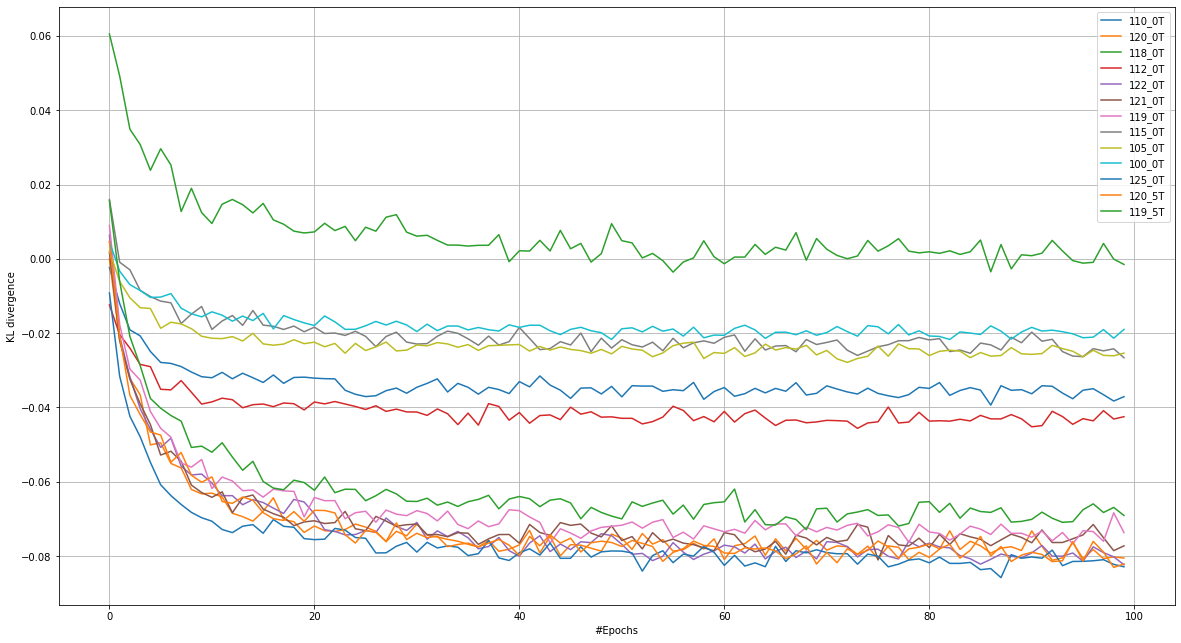

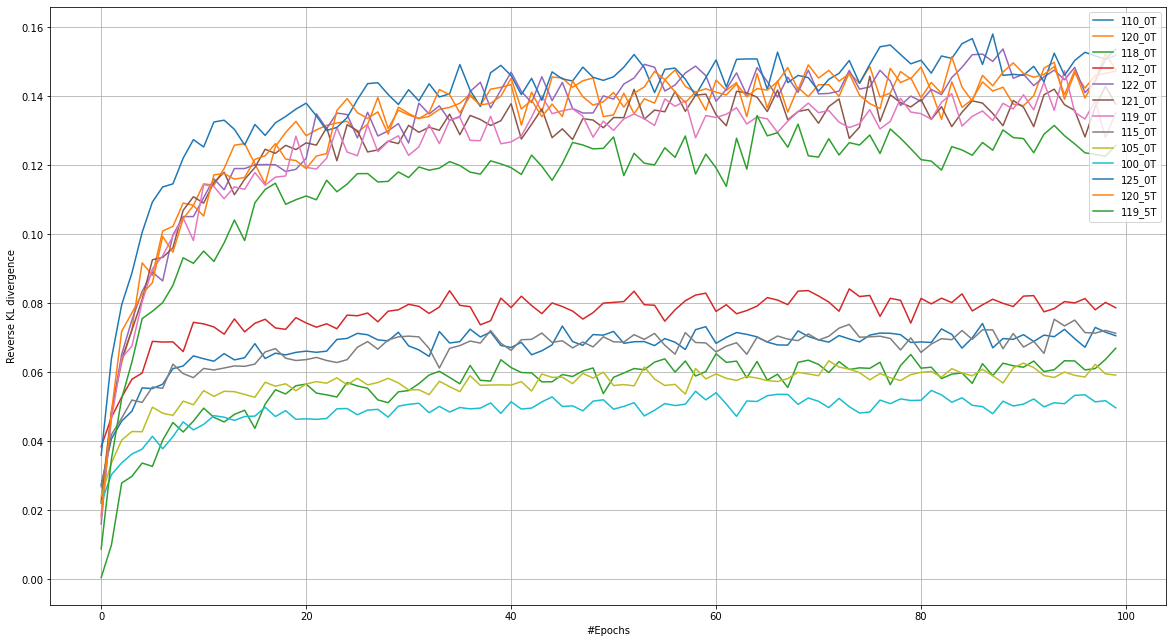

In [36]:
# KL divergence
plt.figure(figsize=(20,11))
for temperature in os.listdir("../results/KL-div"):
    vec_KL_div = np.loadtxt("../results/KL-div/"+temperature, usecols=0)
    n_epochs = np.arange(vec_KL_div.shape[0])
    plt.plot(n_epochs, vec_KL_div,label=temperature[21:-4])
    
plt.xlabel('#Epochs') 
plt.ylabel('KL divergence')
plt.grid(True)
plt.legend(loc="upper right")

# Reverse KL divergence
plt.figure(figsize=(20,11))
for temperature in os.listdir("../results/KL-div"):
    vec_KL_div = np.loadtxt("../results/KL-div/"+temperature, usecols=1)
    n_epochs = np.arange(vec_KL_div.shape[0])
    plt.plot(n_epochs, vec_KL_div,label=temperature[21:-4])
    
plt.xlabel('#Epochs') 
plt.ylabel('Reverse KL divergence')
plt.grid(True)
plt.legend(loc="upper right")

##### Weights
I can also plot the values of the single weights at the and of this 100 Epochs that connect the visible units to the single hidden unit. In the next image I plot diffeent weights at temperatures:

<table>
    <tr>
        <td> 
            <figure>
            <img src="../results/weights/weights-sim-100_0T.jpg" alt="Drawing" style="width: 250px;"/> 
            <figcaption>Temperature: 100 [GROMACS REF T]</figcaption>
            </figure>
        </td>
        <td> 
            <figure>
            <img src="../results/weights/weights-sim-110_0T.jpg" alt="Drawing" style="width: 250px;"/> 
            <figcaption>Temperature: 110 [GROMACS REF T]</figcaption>
            </figure>
        </td>
        <td> 
            <figure>
            <img src="../results/weights/weights-sim-115_0T.jpg" alt="Drawing" style="width: 250px;"/> 
            <figcaption>Temperature: 115 [GROMACS REF T]</figcaption>
            </figure>
        </td>
    </tr>
    <tr>
        <td> 
            <figure>
            <img src="../results/weights/weights-sim-120_0T.jpg" alt="Drawing" style="width: 250px;"/> 
            <figcaption>Temperature: 120 [GROMACS REF T]</figcaption>
            </figure>
        </td>    
        <td> 
            <figure>
            <img src="../results/weights/weights-sim-122_0T.jpg" alt="Drawing" style="width: 250px;"/> 
            <figcaption>Temperature: 122 [GROMACS REF T]</figcaption>
            </figure>
        </td>
        <td> 
            <figure>
            <img src="../results/weights/weights-sim-125_0T.jpg" alt="Drawing" style="width: 250px;"/> 
            <figcaption>Temperature: 125 [GROMACS REF T]</figcaption>
            </figure>
        </td>    
    </tr>    
</table>

#### (ii) Comparison of fantasy and real contact maps 
Once that the RBM is trained at a certain temperature we can compute as many fantasy contact maps as we want. In the next image I report a contact map averaged over $10^4$ fantasy contact map side by side with the averaged contact map over $10^4$ real contact maps extracted from the simulation.

<table>
    <tr>
        <td> 
           <figure>
                <img src="../results/mean_fantasy_cmap/mean_cmap-sim-100_0T.png" alt="Drawing" style="width: 250px;"/> 
                <figcaption>Fantasy cmap -Temperature: 100 [GROMACS REF T]</figcaption>
            </figure>        
        </td>
        <td>
            <figure>
                <img src="mean_cmap/mean_cmap-sim-100_0T.png" alt="Drawing" style="width: 250px;"/> 
                <figcaption>Real cmap -Temperature: 100 [GROMACS REF T]</figcaption>
            </figure>
        </td>    
    </tr>
    <tr>
        <td> 
           <figure>
                <img src="../results/mean_fantasy_cmap/mean_cmap-sim-115_0T.png" alt="Drawing" style="width: 250px;"/> 
                <figcaption>Fantasy cmap -Temperature: 115 [GROMACS REF T]</figcaption>
            </figure>        
        </td>
        <td>
            <figure>
                <img src="mean_cmap/mean_cmap-sim-115_0T.png" alt="Drawing" style="width: 250px;"/> 
                <figcaption>Real cmap -Temperature: 115 [GROMACS REF T]</figcaption>
            </figure>
        </td>
    </tr>
    <tr>
        <td> 
           <figure>
                <img src="../results/mean_fantasy_cmap/mean_cmap-sim-118_0T.png" alt="Drawing" style="width: 250px;"/> 
                <figcaption>Fantasy cmap -Temperature: 118 [GROMACS REF T]</figcaption>
            </figure>        
        </td>
        <td>
            <figure>
                <img src="mean_cmap/mean_cmap-sim-118_0T.png" alt="Drawing" style="width: 250px;"/> 
                <figcaption>Real cmap -Temperature: 118 [GROMACS REF T]</figcaption>
            </figure>
        </td>
    </tr>     
    <tr>
        <td> 
           <figure>
                <img src="../results/mean_fantasy_cmap/mean_cmap-sim-125_0T.png" alt="Drawing" style="width: 250px;"/> 
                <figcaption>Fantasy cmap -Temperature: 125 [GROMACS REF T]</figcaption>
            </figure>        
        </td>
        <td>
            <figure>
                <img src="mean_cmap/mean_cmap-sim-125_0T.png" alt="Drawing" style="width: 250px;"/> 
                <figcaption>Real cmap -Temperature: 125 [GROMACS REF T]</figcaption>
            </figure>
        </td>
    </tr>
</table>

#### (iii) Mean energy and Heat capacity

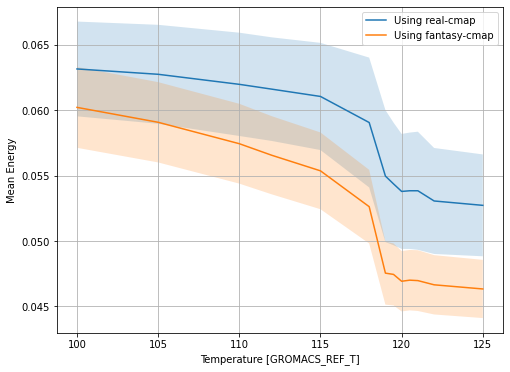

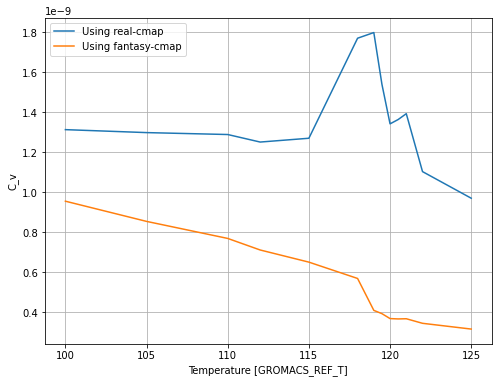

In [23]:
# Load vectors with data
real_cmap_results = np.loadtxt("../results/energy-vs-hc-real-cmap.dat")
real_cmap_results_sorted = real_cmap_results[real_cmap_results[:,0].argsort()]
real_cmap_variance = np.loadtxt("../results/energy-vs-var-real-cmap.dat")
real_cmap_variance_sorted = real_cmap_variance[real_cmap_variance[:,0].argsort()]

temperature = real_cmap_results_sorted[:,0]

real_cmap_mean_energy = real_cmap_results_sorted[:,1]
real_cmap_heat_capacity = real_cmap_results_sorted[:,2]
real_cmap_std_dev = np.sqrt(real_cmap_variance_sorted[:,2])

fantasy_cmap_results = np.loadtxt("../results/energy-vs-hc-fantasy-cmap-1HU.dat")
fantasy_cmap_results_sorted = fantasy_cmap_results[fantasy_cmap_results[:,0].argsort()]
fantasy_cmap_variance = np.loadtxt("../results/energy-vs-var-fantasy-cmap-1HU.dat")
fantasy_cmap_variance_sorted = fantasy_cmap_variance[fantasy_cmap_variance[:,0].argsort()]

fantasy_cmap_mean_energy = fantasy_cmap_results_sorted[:,1]
fantasy_cmap_heat_capacity = fantasy_cmap_results_sorted[:,2]
fantasy_cmap_std_dev = np.sqrt(fantasy_cmap_variance_sorted[:,2])

# Plot Mean energy vs temperature
plt.figure(figsize=(8,6))
# Real cmap
plt.plot(temperature, real_cmap_mean_energy,label="Using real-cmap")
plt.fill_between(temperature, real_cmap_mean_energy-real_cmap_std_dev, real_cmap_mean_energy+real_cmap_std_dev,
    alpha=0.2)
# Fantasy cmap
plt.plot(temperature, fantasy_cmap_mean_energy,label="Using fantasy-cmap")
plt.fill_between(temperature, fantasy_cmap_mean_energy-fantasy_cmap_std_dev, 
    fantasy_cmap_mean_energy+fantasy_cmap_std_dev, alpha=0.2, linestyle='dashdot')

plt.xlabel('Temperature [GROMACS_REF_T]') 
plt.ylabel('Mean Energy')
plt.grid(True)
plt.legend(loc="upper right")

# New figure for separated plots
plt.figure(figsize=(8,6))

# Plot Variance vs temperature
plt.plot(temperature, real_cmap_heat_capacity,label="Using real-cmap") # Real cmap
plt.plot(temperature, fantasy_cmap_heat_capacity,label="Using fantasy-cmap") # Fantasy cmap
plt.xlabel('Temperature [GROMACS_REF_T]') 
plt.ylabel('C_v')
plt.grid(True)
plt.legend(loc="upper left")

plt.show()